In [1]:
!pip install mne

In [2]:
import mne
from mne.preprocessing import ICA
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew , variation
from scipy.signal import welch
import pandas as pd
from scipy.signal import hilbert
import glob
from mne.event import define_target_events

In [3]:
#подгружаем библиотитеку которая октрывает ЭЭГ(картинки) в отдельном окне 
%matplotlib qt

In [4]:
import os

In [54]:
os.chdir('D:/NEURO_BACK UP_22_23/NL/')#прописываем путь до конкретной папки 

In [6]:
#смотрим все файлы в папке 
filenames = glob.glob('*') 
filenames

['NP102302_NL_1.eeg',
 'NP102302_NL_1.vhdr',
 'NP102302_NL_1.vmrk',
 'NP102302_NL_1_after.eeg',
 'NP102302_NL_1_after.vhdr',
 'NP102302_NL_1_after.vmrk',
 'NP102302_NL_2.eeg',
 'NP102302_NL_2.vhdr',
 'NP102302_NL_2.vmrk',
 'NP102302_NL_2_after.eeg',
 'NP102302_NL_2_after.vhdr',
 'NP102302_NL_2_after.vmrk',
 'NP102303_NL_1.eeg',
 'NP102303_NL_1.vhdr',
 'NP102303_NL_1.vmrk',
 'NP102303_NL_1_after.eeg',
 'NP102303_NL_1_after.vhdr',
 'NP102303_NL_1_after.vmrk',
 'NP102303_NL_2.eeg',
 'NP102303_NL_2.vhdr',
 'NP102303_NL_2.vmrk',
 'NP102303_NL_2_after.eeg',
 'NP102303_NL_2_after.vhdr',
 'NP102303_NL_2_after.vmrk',
 'NP102304_NL_1.eeg',
 'NP102304_NL_1.vhdr',
 'NP102304_NL_1.vmrk',
 'NP102304_NL_1_after.eeg',
 'NP102304_NL_1_after.vhdr',
 'NP102304_NL_1_after.vmrk',
 'NP102304_NL_2.eeg',
 'NP102304_NL_2.vhdr',
 'NP102304_NL_2.vmrk',
 'NP102304_NL_2_after.eeg',
 'NP102304_NL_2_after.vhdr',
 'NP102304_NL_2_after.vmrk',
 'NP102305_NL_1.eeg',
 'NP102305_NL_1.vhdr',
 'NP102305_NL_1.vmrk',
 'NP1023

In [29]:
#_NL_2
filenames_1 = glob.glob('*_NL_2.vhdr') 
print(filenames_1)

['NP102302_NL_2.vhdr', 'NP102303_NL_2.vhdr', 'NP102304_NL_2.vhdr', 'NP102305_NL_2.vhdr', 'NP102306_NL_2.vhdr', 'NP102307_NL_2.vhdr', 'NP102308_NL_2.vhdr', 'NP102309_NL_2.vhdr', 'NP102310_NL_2.vhdr', 'NP102311_NL_2.vhdr', 'NP102312_NL_2.vhdr', 'NP102313_NL_2.vhdr', 'NP102314_NL_2.vhdr', 'NP102315_NL_2.vhdr', 'NP112301_NL_2.vhdr', 'NP112302_NL_2.vhdr', 'NP112303_NL_2.vhdr', 'NP112304_NL_2.vhdr', 'NP112306_NL_2.vhdr', 'NP112307_NL_2.vhdr', 'NP112308_NL_2.vhdr', 'NP112309_NL_2.vhdr', 'NP112310_NL_2.vhdr', 'NP112311_NL_2.vhdr', 'NP112313_NL_2.vhdr', 'NP112314_NL_2.vhdr', 'NP112315_NL_2.vhdr', 'NP112316_NL_2.vhdr', 'NP112317_NL_2.vhdr', 'NP112318_NL_2.vhdr', 'NP112319_NL_2.vhdr', 'NP112320_NL_2.vhdr', 'NP112322_NL_2.vhdr', 'NP122301_NL_2.vhdr', 'NP122302_NL_2.vhdr', 'NP122303_NL_2.vhdr']


In [32]:
k = filenames_1
print(len(k))
k

36


['NP102302_NL_2.vhdr',
 'NP102303_NL_2.vhdr',
 'NP102304_NL_2.vhdr',
 'NP102305_NL_2.vhdr',
 'NP102306_NL_2.vhdr',
 'NP102307_NL_2.vhdr',
 'NP102308_NL_2.vhdr',
 'NP102309_NL_2.vhdr',
 'NP102310_NL_2.vhdr',
 'NP102311_NL_2.vhdr',
 'NP102312_NL_2.vhdr',
 'NP102313_NL_2.vhdr',
 'NP102314_NL_2.vhdr',
 'NP102315_NL_2.vhdr',
 'NP112301_NL_2.vhdr',
 'NP112302_NL_2.vhdr',
 'NP112303_NL_2.vhdr',
 'NP112304_NL_2.vhdr',
 'NP112306_NL_2.vhdr',
 'NP112307_NL_2.vhdr',
 'NP112308_NL_2.vhdr',
 'NP112309_NL_2.vhdr',
 'NP112310_NL_2.vhdr',
 'NP112311_NL_2.vhdr',
 'NP112313_NL_2.vhdr',
 'NP112314_NL_2.vhdr',
 'NP112315_NL_2.vhdr',
 'NP112316_NL_2.vhdr',
 'NP112317_NL_2.vhdr',
 'NP112318_NL_2.vhdr',
 'NP112319_NL_2.vhdr',
 'NP112320_NL_2.vhdr',
 'NP112322_NL_2.vhdr',
 'NP122301_NL_2.vhdr',
 'NP122302_NL_2.vhdr',
 'NP122303_NL_2.vhdr']

In [33]:
folder = "D:/resample/NL/"#путь к папке укажи именнор как называетсяна этом пк D:/resample/NL/
for i in range (len(k)):  # определяем цикл по длине ID  
    E = mne.io.read_raw_brainvision(k[i], 
                                  eog=('HEOGL', 'HEOGR', 'VEOGb'), 
                                  misc='auto', scale=1.0, 
                                  preload=True, verbose=None)
    raw_downsampled = E.resample(sfreq=500)
    d = k[i].rstrip("vhdr.")
    print(d)
    raw_downsampled.save(folder + d + '.fif', overwrite=True)

Extracting parameters from NP102302_NL_2.vhdr...
Setting channel info structure...
Reading 0 ... 21197999  =      0.000 ...   423.960 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP102302_NL_2
Writing D:\resample\NL\NP102302_NL_2.fif
Closing D:\resample\NL\NP102302_NL_2.fif
[done]
Extracting parameters from NP102303_NL_2.vhdr...
Setting channel info structure...
Reading 0 ... 20869999  =      0.000 ...   417.400 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102302_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or o

NP102303_NL_2
Writing D:\resample\NL\NP102303_NL_2.fif
Closing D:\resample\NL\NP102303_NL_2.fif
[done]
Extracting parameters from NP102304_NL_2.vhdr...
Setting channel info structure...
Reading 0 ... 21029999  =      0.000 ...   420.600 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102303_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or o

NP102304_NL_2
Writing D:\resample\NL\NP102304_NL_2.fif
Closing D:\resample\NL\NP102304_NL_2.fif
[done]
Extracting parameters from NP102305_NL_2.vhdr...
Setting channel info structure...
Reading 0 ... 21624999  =      0.000 ...   432.500 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102304_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or o

NP102305_NL_2
Writing D:\resample\NL\NP102305_NL_2.fif
Closing D:\resample\NL\NP102305_NL_2.fif
[done]
Extracting parameters from NP102306_NL_2.vhdr...
Setting channel info structure...
Reading 0 ... 19631999  =      0.000 ...   392.640 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102305_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or o

NP102306_NL_2
Writing D:\resample\NL\NP102306_NL_2.fif
Closing D:\resample\NL\NP102306_NL_2.fif
[done]
Extracting parameters from NP102307_NL_2.vhdr...
Setting channel info structure...
Reading 0 ... 19782999  =      0.000 ...   395.660 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102306_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or o

NP102307_NL_2
Writing D:\resample\NL\NP102307_NL_2.fif
Closing D:\resample\NL\NP102307_NL_2.fif
[done]
Extracting parameters from NP102308_NL_2.vhdr...
Setting channel info structure...
Reading 0 ... 12243999  =      0.000 ...   244.880 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102307_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or o

NP102308_NL_2
Writing D:\resample\NL\NP102308_NL_2.fif
Closing D:\resample\NL\NP102308_NL_2.fif
[done]
Extracting parameters from NP102309_NL_2.vhdr...
Setting channel info structure...
Reading 0 ... 30843999  =      0.000 ...   616.880 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102308_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or o

NP102309_NL_2
Writing D:\resample\NL\NP102309_NL_2.fif
Closing D:\resample\NL\NP102309_NL_2.fif
[done]
Extracting parameters from NP102310_NL_2.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102309_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 19966999  =      0.000 ...   399.340 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP102310_NL_2
Writing D:\resample\NL\NP102310_NL_2.fif
Closing D:\resample\NL\NP102310_NL_2.fif
[done]
Extracting parameters from NP102311_NL_2.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102310_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 19706999  =      0.000 ...   394.140 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP102311_NL_2
Writing D:\resample\NL\NP102311_NL_2.fif
Closing D:\resample\NL\NP102311_NL_2.fif
[done]
Extracting parameters from NP102312_NL_2.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102311_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 23638999  =      0.000 ...   472.780 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP102312_NL_2
Writing D:\resample\NL\NP102312_NL_2.fif
Closing D:\resample\NL\NP102312_NL_2.fif
[done]
Extracting parameters from NP102313_NL_2.vhdr...
Setting channel info structure...
Reading 0 ... 20161999  =      0.000 ...   403.240 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102312_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or o

NP102313_NL_2
Writing D:\resample\NL\NP102313_NL_2.fif
Closing D:\resample\NL\NP102313_NL_2.fif
[done]
Extracting parameters from NP102314_NL_2.vhdr...
Setting channel info structure...
Reading 0 ... 22288999  =      0.000 ...   445.780 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102313_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or o

NP102314_NL_2
Writing D:\resample\NL\NP102314_NL_2.fif
Closing D:\resample\NL\NP102314_NL_2.fif
[done]
Extracting parameters from NP102315_NL_2.vhdr...
Setting channel info structure...
Reading 0 ... 24161999  =      0.000 ...   483.240 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102314_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or o

NP102315_NL_2
Writing D:\resample\NL\NP102315_NL_2.fif
Closing D:\resample\NL\NP102315_NL_2.fif
[done]
Extracting parameters from NP112301_NL_2.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102315_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 21002999  =      0.000 ...   420.060 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP112301_NL_2
Writing D:\resample\NL\NP112301_NL_2.fif
Closing D:\resample\NL\NP112301_NL_2.fif
[done]
Extracting parameters from NP112302_NL_2.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112301_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 23884999  =      0.000 ...   477.700 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP112302_NL_2
Writing D:\resample\NL\NP112302_NL_2.fif
Closing D:\resample\NL\NP112302_NL_2.fif
[done]
Extracting parameters from NP112303_NL_2.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112302_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 19091999  =      0.000 ...   381.840 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP112303_NL_2
Writing D:\resample\NL\NP112303_NL_2.fif
Closing D:\resample\NL\NP112303_NL_2.fif
[done]
Extracting parameters from NP112304_NL_2.vhdr...
Setting channel info structure...
Reading 0 ... 21215999  =      0.000 ...   424.320 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112303_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or o

NP112304_NL_2
Writing D:\resample\NL\NP112304_NL_2.fif
Closing D:\resample\NL\NP112304_NL_2.fif
[done]
Extracting parameters from NP112306_NL_2.vhdr...
Setting channel info structure...
Reading 0 ... 22932999  =      0.000 ...   458.660 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112304_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or o

NP112306_NL_2
Writing D:\resample\NL\NP112306_NL_2.fif
Closing D:\resample\NL\NP112306_NL_2.fif
[done]
Extracting parameters from NP112307_NL_2.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112306_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 23539999  =      0.000 ...   470.800 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP112307_NL_2
Writing D:\resample\NL\NP112307_NL_2.fif
Closing D:\resample\NL\NP112307_NL_2.fif
[done]
Extracting parameters from NP112308_NL_2.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112307_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 19842999  =      0.000 ...   396.860 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP112308_NL_2
Writing D:\resample\NL\NP112308_NL_2.fif
Closing D:\resample\NL\NP112308_NL_2.fif
[done]
Extracting parameters from NP112309_NL_2.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112308_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 21031999  =      0.000 ...   420.640 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP112309_NL_2
Writing D:\resample\NL\NP112309_NL_2.fif
Closing D:\resample\NL\NP112309_NL_2.fif
[done]
Extracting parameters from NP112310_NL_2.vhdr...
Setting channel info structure...
Reading 0 ... 20199999  =      0.000 ...   404.000 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112309_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or o

NP112310_NL_2
Writing D:\resample\NL\NP112310_NL_2.fif
Closing D:\resample\NL\NP112310_NL_2.fif
[done]
Extracting parameters from NP112311_NL_2.vhdr...
Setting channel info structure...
Reading 0 ... 20588999  =      0.000 ...   411.780 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112310_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or o

NP112311_NL_2
Writing D:\resample\NL\NP112311_NL_2.fif
Closing D:\resample\NL\NP112311_NL_2.fif
[done]
Extracting parameters from NP112313_NL_2.vhdr...
Setting channel info structure...
Reading 0 ... 20311999  =      0.000 ...   406.240 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112311_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or o

NP112313_NL_2
Writing D:\resample\NL\NP112313_NL_2.fif
Closing D:\resample\NL\NP112313_NL_2.fif
[done]
Extracting parameters from NP112314_NL_2.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112313_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 22320999  =      0.000 ...   446.420 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP112314_NL_2
Writing D:\resample\NL\NP112314_NL_2.fif
Closing D:\resample\NL\NP112314_NL_2.fif
[done]
Extracting parameters from NP112315_NL_2.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112314_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 22421999  =      0.000 ...   448.440 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP112315_NL_2
Writing D:\resample\NL\NP112315_NL_2.fif
Closing D:\resample\NL\NP112315_NL_2.fif
[done]
Extracting parameters from NP112316_NL_2.vhdr...
Setting channel info structure...
Reading 0 ... 20754999  =      0.000 ...   415.100 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112315_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or o

NP112316_NL_2
Writing D:\resample\NL\NP112316_NL_2.fif
Closing D:\resample\NL\NP112316_NL_2.fif
[done]
Extracting parameters from NP112317_NL_2.vhdr...
Setting channel info structure...
Reading 0 ... 19936999  =      0.000 ...   398.740 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112316_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or o

NP112317_NL_2
Writing D:\resample\NL\NP112317_NL_2.fif
Closing D:\resample\NL\NP112317_NL_2.fif
[done]
Extracting parameters from NP112318_NL_2.vhdr...
Setting channel info structure...
Reading 0 ... 23572999  =      0.000 ...   471.460 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112317_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or o

NP112318_NL_2
Writing D:\resample\NL\NP112318_NL_2.fif
Closing D:\resample\NL\NP112318_NL_2.fif
[done]
Extracting parameters from NP112319_NL_2.vhdr...
Setting channel info structure...
Reading 0 ... 19373999  =      0.000 ...   387.480 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112318_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or o

NP112319_NL_2
Writing D:\resample\NL\NP112319_NL_2.fif
Closing D:\resample\NL\NP112319_NL_2.fif
[done]
Extracting parameters from NP112320_NL_2.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112319_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 19265999  =      0.000 ...   385.320 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP112320_NL_2
Writing D:\resample\NL\NP112320_NL_2.fif
Closing D:\resample\NL\NP112320_NL_2.fif
[done]
Extracting parameters from NP112322_NL_2.vhdr...
Setting channel info structure...
Reading 0 ... 22736999  =      0.000 ...   454.740 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112320_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or o

NP112322_NL_2
Writing D:\resample\NL\NP112322_NL_2.fif
Closing D:\resample\NL\NP112322_NL_2.fif
[done]
Extracting parameters from NP122301_NL_2.vhdr...
Setting channel info structure...
Reading 0 ... 11177999  =      0.000 ...   223.560 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112322_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or o

NP122301_NL_2
Writing D:\resample\NL\NP122301_NL_2.fif
Closing D:\resample\NL\NP122301_NL_2.fif
[done]
Extracting parameters from NP122302_NL_2.vhdr...
Setting channel info structure...
Reading 0 ... 12673999  =      0.000 ...   253.480 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP122301_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or o

NP122302_NL_2
Writing D:\resample\NL\NP122302_NL_2.fif
Closing D:\resample\NL\NP122302_NL_2.fif
[done]
Extracting parameters from NP122303_NL_2.vhdr...
Setting channel info structure...
Reading 0 ... 11788999  =      0.000 ...   235.780 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP122302_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or o

NP122303_NL_2
Writing D:\resample\NL\NP122303_NL_2.fif
Closing D:\resample\NL\NP122303_NL_2.fif
[done]


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\382493393.py:10: RuntimeWarning: This filename (D:\resample\NL\NP122303_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)


In [36]:
#NL_2_after 
filenames_2 = glob.glob('*NL_2_after.vhdr') 
print(filenames_2)

['NP102302_NL_2_after.vhdr', 'NP102303_NL_2_after.vhdr', 'NP102304_NL_2_after.vhdr', 'NP102305_NL_2_after.vhdr', 'NP102306_NL_2_after.vhdr', 'NP102307_NL_2_after.vhdr', 'NP102308_NL_2_after.vhdr', 'NP102310_NL_2_after.vhdr', 'NP102311_NL_2_after.vhdr', 'NP102312_NL_2_after.vhdr', 'NP102313_NL_2_after.vhdr', 'NP102314_NL_2_after.vhdr', 'NP102315_NL_2_after.vhdr', 'NP112301_NL_2_after.vhdr', 'NP112302_NL_2_after.vhdr', 'NP112303_NL_2_after.vhdr', 'NP112304_NL_2_after.vhdr', 'NP112306_NL_2_after.vhdr', 'NP112307_NL_2_after.vhdr', 'NP112308_NL_2_after.vhdr', 'NP112310_NL_2_after.vhdr', 'NP112311_NL_2_after.vhdr', 'NP112313_NL_2_after.vhdr', 'NP112314_NL_2_after.vhdr', 'NP112315_NL_2_after.vhdr', 'NP112316_NL_2_after.vhdr', 'NP112317_NL_2_after.vhdr', 'NP112318_NL_2_after.vhdr', 'NP112319_NL_2_after.vhdr', 'NP112320_NL_2_after.vhdr', 'NP112322_NL_2_after.vhdr', 'NP122301_NL_2_after.vhdr', 'NP122302_NL_2_after.vhdr', 'NP122303_NL_2_after.vhdr']


In [37]:
k = filenames_2
k

['NP102302_NL_2_after.vhdr',
 'NP102303_NL_2_after.vhdr',
 'NP102304_NL_2_after.vhdr',
 'NP102305_NL_2_after.vhdr',
 'NP102306_NL_2_after.vhdr',
 'NP102307_NL_2_after.vhdr',
 'NP102308_NL_2_after.vhdr',
 'NP102310_NL_2_after.vhdr',
 'NP102311_NL_2_after.vhdr',
 'NP102312_NL_2_after.vhdr',
 'NP102313_NL_2_after.vhdr',
 'NP102314_NL_2_after.vhdr',
 'NP102315_NL_2_after.vhdr',
 'NP112301_NL_2_after.vhdr',
 'NP112302_NL_2_after.vhdr',
 'NP112303_NL_2_after.vhdr',
 'NP112304_NL_2_after.vhdr',
 'NP112306_NL_2_after.vhdr',
 'NP112307_NL_2_after.vhdr',
 'NP112308_NL_2_after.vhdr',
 'NP112310_NL_2_after.vhdr',
 'NP112311_NL_2_after.vhdr',
 'NP112313_NL_2_after.vhdr',
 'NP112314_NL_2_after.vhdr',
 'NP112315_NL_2_after.vhdr',
 'NP112316_NL_2_after.vhdr',
 'NP112317_NL_2_after.vhdr',
 'NP112318_NL_2_after.vhdr',
 'NP112319_NL_2_after.vhdr',
 'NP112320_NL_2_after.vhdr',
 'NP112322_NL_2_after.vhdr',
 'NP122301_NL_2_after.vhdr',
 'NP122302_NL_2_after.vhdr',
 'NP122303_NL_2_after.vhdr']

In [38]:
folder = "D:/resample/NL/"#путь к папке
for i in range (len(k)):  # определяем цикл по длине ID  
    E = mne.io.read_raw_brainvision(k[i], 
                                  eog=('HEOGL', 'HEOGR', 'VEOGb'), 
                                  misc='auto', scale=1.0, 
                                  preload=True, verbose=None)
    raw_downsampled = E.resample(sfreq=500)
    d = k[i].rstrip("vhdr.")
    print(d)
    raw_downsampled.save(folder + d + 'r.fif', overwrite=True)

Extracting parameters from NP102302_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 3096999  =      0.000 ...    61.940 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP102302_NL_2_afte
Writing D:\resample\NL\NP102302_NL_2_afte.fif
Closing D:\resample\NL\NP102302_NL_2_afte.fif
[done]
Extracting parameters from NP102303_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 2719999  =      0.000 ...    54.400 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102302_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP102303_NL_2_afte
Writing D:\resample\NL\NP102303_NL_2_afte.fif
Closing D:\resample\NL\NP102303_NL_2_afte.fif
[done]
Extracting parameters from NP102304_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 2318999  =      0.000 ...    46.380 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102303_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP102304_NL_2_afte
Writing D:\resample\NL\NP102304_NL_2_afte.fif
Closing D:\resample\NL\NP102304_NL_2_afte.fif
[done]
Extracting parameters from NP102305_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 2455999  =      0.000 ...    49.120 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102304_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP102305_NL_2_afte
Writing D:\resample\NL\NP102305_NL_2_afte.fif
Closing D:\resample\NL\NP102305_NL_2_afte.fif
[done]
Extracting parameters from NP102306_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 1906999  =      0.000 ...    38.140 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102305_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP102306_NL_2_afte
Writing D:\resample\NL\NP102306_NL_2_afte.fif
Closing D:\resample\NL\NP102306_NL_2_afte.fif
[done]
Extracting parameters from NP102307_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 2487999  =      0.000 ...    49.760 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102306_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP102307_NL_2_afte
Writing D:\resample\NL\NP102307_NL_2_afte.fif
Closing D:\resample\NL\NP102307_NL_2_afte.fif
[done]
Extracting parameters from NP102308_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 2567999  =      0.000 ...    51.360 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102307_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP102308_NL_2_afte
Writing D:\resample\NL\NP102308_NL_2_afte.fif
Closing D:\resample\NL\NP102308_NL_2_afte.fif
[done]
Extracting parameters from NP102310_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 2403999  =      0.000 ...    48.080 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102308_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP102310_NL_2_afte
Writing D:\resample\NL\NP102310_NL_2_afte.fif
Closing D:\resample\NL\NP102310_NL_2_afte.fif
[done]
Extracting parameters from NP102311_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 2227999  =      0.000 ...    44.560 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102310_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP102311_NL_2_afte
Writing D:\resample\NL\NP102311_NL_2_afte.fif
Closing D:\resample\NL\NP102311_NL_2_afte.fif
[done]
Extracting parameters from NP102312_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 5978999  =      0.000 ...   119.580 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102311_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP102312_NL_2_afte
Writing D:\resample\NL\NP102312_NL_2_afte.fif
Closing D:\resample\NL\NP102312_NL_2_afte.fif
[done]
Extracting parameters from NP102313_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 2525999  =      0.000 ...    50.520 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102312_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP102313_NL_2_afte
Writing D:\resample\NL\NP102313_NL_2_afte.fif
Closing D:\resample\NL\NP102313_NL_2_afte.fif
[done]
Extracting parameters from NP102314_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 1661999  =      0.000 ...    33.240 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102313_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP102314_NL_2_afte
Writing D:\resample\NL\NP102314_NL_2_afte.fif
Closing D:\resample\NL\NP102314_NL_2_afte.fif
[done]
Extracting parameters from NP102315_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 2217999  =      0.000 ...    44.360 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102314_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP102315_NL_2_afte
Writing D:\resample\NL\NP102315_NL_2_afte.fif
Closing D:\resample\NL\NP102315_NL_2_afte.fif
[done]
Extracting parameters from NP112301_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 2224999  =      0.000 ...    44.500 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102315_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP112301_NL_2_afte
Writing D:\resample\NL\NP112301_NL_2_afte.fif
Closing D:\resample\NL\NP112301_NL_2_afte.fif
[done]
Extracting parameters from NP112302_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 1782999  =      0.000 ...    35.660 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112301_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP112302_NL_2_afte
Writing D:\resample\NL\NP112302_NL_2_afte.fif
Closing D:\resample\NL\NP112302_NL_2_afte.fif
[done]
Extracting parameters from NP112303_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 1775999  =      0.000 ...    35.520 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112302_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP112303_NL_2_afte
Writing D:\resample\NL\NP112303_NL_2_afte.fif
Closing D:\resample\NL\NP112303_NL_2_afte.fif
[done]
Extracting parameters from NP112304_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 1947999  =      0.000 ...    38.960 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112303_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP112304_NL_2_afte
Writing D:\resample\NL\NP112304_NL_2_afte.fif
Closing D:\resample\NL\NP112304_NL_2_afte.fif
[done]
Extracting parameters from NP112306_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 4815999  =      0.000 ...    96.320 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112304_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP112306_NL_2_afte
Writing D:\resample\NL\NP112306_NL_2_afte.fif
Closing D:\resample\NL\NP112306_NL_2_afte.fif
[done]
Extracting parameters from NP112307_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 1855999  =      0.000 ...    37.120 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112306_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP112307_NL_2_afte
Writing D:\resample\NL\NP112307_NL_2_afte.fif
Closing D:\resample\NL\NP112307_NL_2_afte.fif
[done]
Extracting parameters from NP112308_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 1865999  =      0.000 ...    37.320 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112307_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP112308_NL_2_afte
Writing D:\resample\NL\NP112308_NL_2_afte.fif
Closing D:\resample\NL\NP112308_NL_2_afte.fif
[done]
Extracting parameters from NP112310_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 2358999  =      0.000 ...    47.180 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112308_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP112310_NL_2_afte
Writing D:\resample\NL\NP112310_NL_2_afte.fif
Closing D:\resample\NL\NP112310_NL_2_afte.fif
[done]
Extracting parameters from NP112311_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 3654999  =      0.000 ...    73.100 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112310_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP112311_NL_2_afte
Writing D:\resample\NL\NP112311_NL_2_afte.fif
Closing D:\resample\NL\NP112311_NL_2_afte.fif
[done]
Extracting parameters from NP112313_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 1635999  =      0.000 ...    32.720 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112311_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP112313_NL_2_afte
Writing D:\resample\NL\NP112313_NL_2_afte.fif
Closing D:\resample\NL\NP112313_NL_2_afte.fif
[done]
Extracting parameters from NP112314_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 2113999  =      0.000 ...    42.280 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112313_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP112314_NL_2_afte
Writing D:\resample\NL\NP112314_NL_2_afte.fif
Closing D:\resample\NL\NP112314_NL_2_afte.fif
[done]
Extracting parameters from NP112315_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 1816999  =      0.000 ...    36.340 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112314_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP112315_NL_2_afte
Writing D:\resample\NL\NP112315_NL_2_afte.fif
Closing D:\resample\NL\NP112315_NL_2_afte.fif
[done]
Extracting parameters from NP112316_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 4067999  =      0.000 ...    81.360 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112315_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP112316_NL_2_afte
Writing D:\resample\NL\NP112316_NL_2_afte.fif
Closing D:\resample\NL\NP112316_NL_2_afte.fif
[done]
Extracting parameters from NP112317_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 2024999  =      0.000 ...    40.500 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112316_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP112317_NL_2_afte
Writing D:\resample\NL\NP112317_NL_2_afte.fif
Closing D:\resample\NL\NP112317_NL_2_afte.fif
[done]
Extracting parameters from NP112318_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 2066999  =      0.000 ...    41.340 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112317_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP112318_NL_2_afte
Writing D:\resample\NL\NP112318_NL_2_afte.fif
Closing D:\resample\NL\NP112318_NL_2_afte.fif
[done]
Extracting parameters from NP112319_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 1661999  =      0.000 ...    33.240 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112318_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP112319_NL_2_afte
Writing D:\resample\NL\NP112319_NL_2_afte.fif
Closing D:\resample\NL\NP112319_NL_2_afte.fif
[done]
Extracting parameters from NP112320_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 1871999  =      0.000 ...    37.440 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112319_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP112320_NL_2_afte
Writing D:\resample\NL\NP112320_NL_2_afte.fif
Closing D:\resample\NL\NP112320_NL_2_afte.fif
[done]
Extracting parameters from NP112322_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 2308999  =      0.000 ...    46.180 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112320_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP112322_NL_2_afte
Writing D:\resample\NL\NP112322_NL_2_afte.fif
Closing D:\resample\NL\NP112322_NL_2_afte.fif
[done]
Extracting parameters from NP122301_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 1799999  =      0.000 ...    36.000 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112322_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP122301_NL_2_afte
Writing D:\resample\NL\NP122301_NL_2_afte.fif
Closing D:\resample\NL\NP122301_NL_2_afte.fif
[done]
Extracting parameters from NP122302_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 2197999  =      0.000 ...    43.960 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP122301_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP122302_NL_2_afte
Writing D:\resample\NL\NP122302_NL_2_afte.fif
Closing D:\resample\NL\NP122302_NL_2_afte.fif
[done]
Extracting parameters from NP122303_NL_2_after.vhdr...
Setting channel info structure...
Reading 0 ... 1665999  =      0.000 ...    33.320 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP122302_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_monta

NP122303_NL_2_afte
Writing D:\resample\NL\NP122303_NL_2_afte.fif
Closing D:\resample\NL\NP122303_NL_2_afte.fif
[done]


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP122303_NL_2_afte.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)


In [39]:
#_NL_1
filenames_3 = glob.glob('*_NL_1.vhdr') 
print(filenames_3)

['NP102302_NL_1.vhdr', 'NP102303_NL_1.vhdr', 'NP102304_NL_1.vhdr', 'NP102305_NL_1.vhdr', 'NP102306_NL_1.vhdr', 'NP102307_NL_1.vhdr', 'NP102308_NL_1.vhdr', 'NP102309_NL_1.vhdr', 'NP102310_NL_1.vhdr', 'NP102311_NL_1.vhdr', 'NP102312_NL_1.vhdr', 'NP102313_NL_1.vhdr', 'NP102314_NL_1.vhdr', 'NP102315_NL_1.vhdr', 'NP112301_NL_1.vhdr', 'NP112302_NL_1.vhdr', 'NP112303_NL_1.vhdr', 'NP112304_NL_1.vhdr', 'NP112306_NL_1.vhdr', 'NP112307_NL_1.vhdr', 'NP112308_NL_1.vhdr', 'NP112309_NL_1.vhdr', 'NP112310_NL_1.vhdr', 'NP112311_NL_1.vhdr', 'NP112313_NL_1.vhdr', 'NP112314_NL_1.vhdr', 'NP112315_NL_1.vhdr', 'NP112316_NL_1.vhdr', 'NP112317_NL_1.vhdr', 'NP112318_NL_1.vhdr', 'NP112319_NL_1.vhdr', 'NP112320_NL_1.vhdr', 'NP112321_NL_1.vhdr', 'NP112322_NL_1.vhdr', 'NP122301_NL_1.vhdr', 'NP122302_NL_1.vhdr', 'NP122303_NL_1.vhdr']


In [40]:
k = filenames_3
k

['NP102302_NL_1.vhdr',
 'NP102303_NL_1.vhdr',
 'NP102304_NL_1.vhdr',
 'NP102305_NL_1.vhdr',
 'NP102306_NL_1.vhdr',
 'NP102307_NL_1.vhdr',
 'NP102308_NL_1.vhdr',
 'NP102309_NL_1.vhdr',
 'NP102310_NL_1.vhdr',
 'NP102311_NL_1.vhdr',
 'NP102312_NL_1.vhdr',
 'NP102313_NL_1.vhdr',
 'NP102314_NL_1.vhdr',
 'NP102315_NL_1.vhdr',
 'NP112301_NL_1.vhdr',
 'NP112302_NL_1.vhdr',
 'NP112303_NL_1.vhdr',
 'NP112304_NL_1.vhdr',
 'NP112306_NL_1.vhdr',
 'NP112307_NL_1.vhdr',
 'NP112308_NL_1.vhdr',
 'NP112309_NL_1.vhdr',
 'NP112310_NL_1.vhdr',
 'NP112311_NL_1.vhdr',
 'NP112313_NL_1.vhdr',
 'NP112314_NL_1.vhdr',
 'NP112315_NL_1.vhdr',
 'NP112316_NL_1.vhdr',
 'NP112317_NL_1.vhdr',
 'NP112318_NL_1.vhdr',
 'NP112319_NL_1.vhdr',
 'NP112320_NL_1.vhdr',
 'NP112321_NL_1.vhdr',
 'NP112322_NL_1.vhdr',
 'NP122301_NL_1.vhdr',
 'NP122302_NL_1.vhdr',
 'NP122303_NL_1.vhdr']

In [41]:
folder = "D:/resample/NL/"#путь к папке 
for i in range (len(k)):  # определяем цикл по длине ID  
    E = mne.io.read_raw_brainvision(k[i], 
                                  eog=('HEOGL', 'HEOGR', 'VEOGb'), 
                                  misc='auto', scale=1.0, 
                                  preload=True, verbose=None)
    raw_downsampled = E.resample(sfreq=500)
    d = k[i].rstrip("vhdr.")
    print(d)
    raw_downsampled.save(folder + d + '.fif', overwrite=True)

Extracting parameters from NP102302_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 33168999  =      0.000 ...   663.380 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP102302_NL_1
Writing D:\resample\NL\NP102302_NL_1.fif
Closing D:\resample\NL\NP102302_NL_1.fif
[done]
Extracting parameters from NP102303_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102302_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 32398999  =      0.000 ...   647.980 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP102303_NL_1
Writing D:\resample\NL\NP102303_NL_1.fif
Closing D:\resample\NL\NP102303_NL_1.fif
[done]
Extracting parameters from NP102304_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102303_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 33147999  =      0.000 ...   662.960 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP102304_NL_1
Writing D:\resample\NL\NP102304_NL_1.fif
Closing D:\resample\NL\NP102304_NL_1.fif
[done]
Extracting parameters from NP102305_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102304_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 30952999  =      0.000 ...   619.060 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP102305_NL_1
Writing D:\resample\NL\NP102305_NL_1.fif
Closing D:\resample\NL\NP102305_NL_1.fif
[done]
Extracting parameters from NP102306_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102305_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 38497999  =      0.000 ...   769.960 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP102306_NL_1
Writing D:\resample\NL\NP102306_NL_1.fif
Closing D:\resample\NL\NP102306_NL_1.fif
[done]
Extracting parameters from NP102307_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102306_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 30446999  =      0.000 ...   608.940 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP102307_NL_1
Writing D:\resample\NL\NP102307_NL_1.fif
Closing D:\resample\NL\NP102307_NL_1.fif
[done]
Extracting parameters from NP102308_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102307_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 39849999  =      0.000 ...   797.000 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP102308_NL_1
Writing D:\resample\NL\NP102308_NL_1.fif
Closing D:\resample\NL\NP102308_NL_1.fif
[done]
Extracting parameters from NP102309_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102308_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 42633999  =      0.000 ...   852.680 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP102309_NL_1
Writing D:\resample\NL\NP102309_NL_1.fif
Closing D:\resample\NL\NP102309_NL_1.fif
[done]
Extracting parameters from NP102310_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102309_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 34358999  =      0.000 ...   687.180 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP102310_NL_1
Writing D:\resample\NL\NP102310_NL_1.fif
Closing D:\resample\NL\NP102310_NL_1.fif
[done]
Extracting parameters from NP102311_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102310_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 26947999  =      0.000 ...   538.960 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP102311_NL_1
Writing D:\resample\NL\NP102311_NL_1.fif
Closing D:\resample\NL\NP102311_NL_1.fif
[done]
Extracting parameters from NP102312_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102311_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 35192999  =      0.000 ...   703.860 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP102312_NL_1
Writing D:\resample\NL\NP102312_NL_1.fif
Closing D:\resample\NL\NP102312_NL_1.fif
[done]
Extracting parameters from NP102313_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102312_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 34285999  =      0.000 ...   685.720 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP102313_NL_1
Writing D:\resample\NL\NP102313_NL_1.fif
Closing D:\resample\NL\NP102313_NL_1.fif
[done]
Extracting parameters from NP102314_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102313_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 30013999  =      0.000 ...   600.280 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP102314_NL_1
Writing D:\resample\NL\NP102314_NL_1.fif
Closing D:\resample\NL\NP102314_NL_1.fif
[done]
Extracting parameters from NP102315_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102314_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 39660999  =      0.000 ...   793.220 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP102315_NL_1
Writing D:\resample\NL\NP102315_NL_1.fif
Closing D:\resample\NL\NP102315_NL_1.fif
[done]
Extracting parameters from NP112301_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP102315_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 32835999  =      0.000 ...   656.720 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP112301_NL_1
Writing D:\resample\NL\NP112301_NL_1.fif
Closing D:\resample\NL\NP112301_NL_1.fif
[done]
Extracting parameters from NP112302_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112301_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 33665999  =      0.000 ...   673.320 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP112302_NL_1
Writing D:\resample\NL\NP112302_NL_1.fif
Closing D:\resample\NL\NP112302_NL_1.fif
[done]
Extracting parameters from NP112303_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112302_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 26528999  =      0.000 ...   530.580 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP112303_NL_1
Writing D:\resample\NL\NP112303_NL_1.fif
Closing D:\resample\NL\NP112303_NL_1.fif
[done]
Extracting parameters from NP112304_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112303_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 26514999  =      0.000 ...   530.300 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP112304_NL_1
Writing D:\resample\NL\NP112304_NL_1.fif
Closing D:\resample\NL\NP112304_NL_1.fif
[done]
Extracting parameters from NP112306_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112304_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 32665999  =      0.000 ...   653.320 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP112306_NL_1
Writing D:\resample\NL\NP112306_NL_1.fif
Closing D:\resample\NL\NP112306_NL_1.fif
[done]
Extracting parameters from NP112307_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112306_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 33281999  =      0.000 ...   665.640 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP112307_NL_1
Writing D:\resample\NL\NP112307_NL_1.fif
Closing D:\resample\NL\NP112307_NL_1.fif
[done]
Extracting parameters from NP112308_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112307_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 27509999  =      0.000 ...   550.200 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP112308_NL_1
Writing D:\resample\NL\NP112308_NL_1.fif
Closing D:\resample\NL\NP112308_NL_1.fif
[done]
Extracting parameters from NP112309_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112308_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 28583999  =      0.000 ...   571.680 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP112309_NL_1
Writing D:\resample\NL\NP112309_NL_1.fif
Closing D:\resample\NL\NP112309_NL_1.fif
[done]
Extracting parameters from NP112310_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112309_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 32729999  =      0.000 ...   654.600 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP112310_NL_1
Writing D:\resample\NL\NP112310_NL_1.fif
Closing D:\resample\NL\NP112310_NL_1.fif
[done]
Extracting parameters from NP112311_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112310_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 28134999  =      0.000 ...   562.700 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP112311_NL_1
Writing D:\resample\NL\NP112311_NL_1.fif
Closing D:\resample\NL\NP112311_NL_1.fif
[done]
Extracting parameters from NP112313_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112311_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 32096999  =      0.000 ...   641.940 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP112313_NL_1
Writing D:\resample\NL\NP112313_NL_1.fif
Closing D:\resample\NL\NP112313_NL_1.fif
[done]
Extracting parameters from NP112314_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112313_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 29637999  =      0.000 ...   592.760 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP112314_NL_1
Writing D:\resample\NL\NP112314_NL_1.fif
Closing D:\resample\NL\NP112314_NL_1.fif
[done]
Extracting parameters from NP112315_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112314_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 36421999  =      0.000 ...   728.440 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP112315_NL_1
Writing D:\resample\NL\NP112315_NL_1.fif
Closing D:\resample\NL\NP112315_NL_1.fif
[done]
Extracting parameters from NP112316_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112315_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 31664999  =      0.000 ...   633.300 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP112316_NL_1
Writing D:\resample\NL\NP112316_NL_1.fif
Closing D:\resample\NL\NP112316_NL_1.fif
[done]
Extracting parameters from NP112317_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112316_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 31805999  =      0.000 ...   636.120 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP112317_NL_1
Writing D:\resample\NL\NP112317_NL_1.fif
Closing D:\resample\NL\NP112317_NL_1.fif
[done]
Extracting parameters from NP112318_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112317_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 40516999  =      0.000 ...   810.340 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP112318_NL_1
Writing D:\resample\NL\NP112318_NL_1.fif
Closing D:\resample\NL\NP112318_NL_1.fif
[done]
Extracting parameters from NP112319_NL_1.vhdr...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112318_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)


Setting channel info structure...
Reading 0 ... 26502999  =      0.000 ...   530.060 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP112319_NL_1
Writing D:\resample\NL\NP112319_NL_1.fif
Closing D:\resample\NL\NP112319_NL_1.fif
[done]
Extracting parameters from NP112320_NL_1.vhdr...
Setting channel info structure...
Reading 0 ... 11246999  =      0.000 ...   224.940 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112319_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, o

NP112320_NL_1
Writing D:\resample\NL\NP112320_NL_1.fif
Closing D:\resample\NL\NP112320_NL_1.fif
[done]
Extracting parameters from NP112321_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112320_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 37751999  =      0.000 ...   755.040 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP112321_NL_1
Writing D:\resample\NL\NP112321_NL_1.fif
Closing D:\resample\NL\NP112321_NL_1.fif
[done]
Extracting parameters from NP112322_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112321_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 15626999  =      0.000 ...   312.540 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP112322_NL_1
Writing D:\resample\NL\NP112322_NL_1.fif
Closing D:\resample\NL\NP112322_NL_1.fif
[done]
Extracting parameters from NP122301_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP112322_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 36123999  =      0.000 ...   722.480 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP122301_NL_1
Writing D:\resample\NL\NP122301_NL_1.fif
Closing D:\resample\NL\NP122301_NL_1.fif
[done]
Extracting parameters from NP122302_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP122301_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 37102999  =      0.000 ...   742.060 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP122302_NL_1
Writing D:\resample\NL\NP122302_NL_1.fif
Closing D:\resample\NL\NP122302_NL_1.fif
[done]
Extracting parameters from NP122303_NL_1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP122302_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 37294999  =      0.000 ...   745.900 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP122303_NL_1
Writing D:\resample\NL\NP122303_NL_1.fif
Closing D:\resample\NL\NP122303_NL_1.fif
[done]


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2287380994.py:10: RuntimeWarning: This filename (D:\resample\NL\NP122303_NL_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)


In [58]:
#NL_1_after
filenames_4 = glob.glob('*NL_1_after.vhdr') 
print(filenames_4)

['NP102302_NL_1_after.vhdr', 'NP102303_NL_1_after.vhdr', 'NP102304_NL_1_after.vhdr', 'NP102305_NL_1_after.vhdr', 'NP102306_NL_1_after.vhdr', 'NP102307_NL_1_after.vhdr', 'NP102308_NL_1_after.vhdr', 'NP102310_NL_1_after.vhdr', 'NP102311_NL_1_after.vhdr', 'NP102312_NL_1_after.vhdr', 'NP102313_NL_1_after.vhdr', 'NP102314_NL_1_after.vhdr', 'NP102315_NL_1_after.vhdr', 'NP112301_NL_1_after.vhdr', 'NP112302_NL_1_after.vhdr', 'NP112303_NL_1_after.vhdr', 'NP112304_NL_1_after.vhdr', 'NP112306_NL_1_after.vhdr', 'NP112308_NL_1_after.vhdr', 'NP112309_NL_1_after.vhdr', 'NP112310_NL_1_after.vhdr', 'NP112311_NL_1_after.vhdr', 'NP112313_NL_1_after.vhdr', 'NP112314_NL_1_after.vhdr', 'NP112315_NL_1_after.vhdr', 'NP112316_NL_1_after.vhdr', 'NP112317_NL_1_after.vhdr', 'NP112318_NL_1_after.vhdr', 'NP112319_NL_1_after.vhdr', 'NP112320_NL_1_after.vhdr', 'NP112321_NL_1_after.vhdr', 'NP112322_NL_1_after.vhdr', 'NP122301_NL_1_after.vhdr', 'NP122302_NL_1_after.vhdr', 'NP122303_NL_1_after.vhdr']


In [61]:
k = filenames_4[1]
k

'NP102303_NL_1_after.vhdr'

In [63]:
folder = "D:/resample/NL/"#путь к папке 
for i in range (len(k)):  # определяем цикл по длине ID  
    E = mne.io.read_raw_brainvision(NP102303_NL_1_2.vmrk, 
                                  eog=('HEOGL', 'HEOGR', 'VEOGb'), 
                                  misc='auto', scale=1.0, 
                                  preload=True, verbose=None)
    raw_downsampled = E.resample(sfreq=500)
    d = k[i].rstrip("vhdr.")
    print(d)
    raw_downsampled.save(folder + d + 'r.fif', overwrite=True)

NameError: name 'NP102303_NL_1_2' is not defined

In [47]:
os.chdir('D:/NEURO_BACK UP_22_23/MU/')#меняем папку на mu

In [48]:
#_mu1
filenames_5 = glob.glob('*_mu1.vhdr') 
print(filenames_5)

['NP102302_mu1.vhdr', 'NP102303_mu1.vhdr', 'NP102304_mu1.vhdr', 'NP102305_mu1.vhdr', 'NP102306_mu1.vhdr', 'NP102307_mu1.vhdr', 'NP102308_mu1.vhdr', 'NP102309_mu1.vhdr', 'NP102310_mu1.vhdr', 'NP102311_mu1.vhdr', 'NP102312_mu1.vhdr', 'NP102313_mu1.vhdr', 'NP102314_mu1.vhdr', 'NP102315_mu1.vhdr', 'NP112301_mu1.vhdr', 'NP112302_mu1.vhdr', 'NP112303_mu1.vhdr', 'NP112304_mu1.vhdr', 'NP112306_mu1.vhdr', 'NP112307_mu1.vhdr', 'NP112308_mu1.vhdr', 'NP112309_mu1.vhdr', 'NP112310_mu1.vhdr', 'NP112311_mu1.vhdr', 'NP112313_mu1.vhdr', 'NP112314_mu1.vhdr', 'NP112315_mu1.vhdr', 'NP112316_mu1.vhdr', 'NP112318_mu1.vhdr', 'NP112319_mu1.vhdr', 'NP112320_mu1.vhdr', 'NP112321_mu1.vhdr', 'NP112322_mu1.vhdr', 'NP122301_mu1.vhdr', 'NP122302_mu1.vhdr', 'NP122303_mu1.vhdr']


In [49]:
k = filenames_5
print(len(k))
k

36


['NP102302_mu1.vhdr',
 'NP102303_mu1.vhdr',
 'NP102304_mu1.vhdr',
 'NP102305_mu1.vhdr',
 'NP102306_mu1.vhdr',
 'NP102307_mu1.vhdr',
 'NP102308_mu1.vhdr',
 'NP102309_mu1.vhdr',
 'NP102310_mu1.vhdr',
 'NP102311_mu1.vhdr',
 'NP102312_mu1.vhdr',
 'NP102313_mu1.vhdr',
 'NP102314_mu1.vhdr',
 'NP102315_mu1.vhdr',
 'NP112301_mu1.vhdr',
 'NP112302_mu1.vhdr',
 'NP112303_mu1.vhdr',
 'NP112304_mu1.vhdr',
 'NP112306_mu1.vhdr',
 'NP112307_mu1.vhdr',
 'NP112308_mu1.vhdr',
 'NP112309_mu1.vhdr',
 'NP112310_mu1.vhdr',
 'NP112311_mu1.vhdr',
 'NP112313_mu1.vhdr',
 'NP112314_mu1.vhdr',
 'NP112315_mu1.vhdr',
 'NP112316_mu1.vhdr',
 'NP112318_mu1.vhdr',
 'NP112319_mu1.vhdr',
 'NP112320_mu1.vhdr',
 'NP112321_mu1.vhdr',
 'NP112322_mu1.vhdr',
 'NP122301_mu1.vhdr',
 'NP122302_mu1.vhdr',
 'NP122303_mu1.vhdr']

In [50]:
folder = "D:/resample/MU/"#путь к папке 
for i in range (len(k)):  # определяем цикл по длине ID  
    E = mne.io.read_raw_brainvision(k[i], 
                                  eog=('HEOGL', 'HEOGR', 'VEOGb'), 
                                  misc='auto', scale=1.0, 
                                  preload=True, verbose=None)
    raw_downsampled = E.resample(sfreq=500)
    d = k[i].rstrip("vhdr.")
    print(d)
    raw_downsampled.save(folder + d + '.fif', overwrite=True)

Extracting parameters from NP102302_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 12851999  =      0.000 ...   257.040 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP102302_mu1
Writing D:\resample\MU\NP102302_mu1.fif
Closing D:\resample\MU\NP102302_mu1.fif
[done]
Extracting parameters from NP102303_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 12816999  =      0.000 ...   256.340 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP102302_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP102303_mu1
Writing D:\resample\MU\NP102303_mu1.fif
Closing D:\resample\MU\NP102303_mu1.fif
[done]
Extracting parameters from NP102304_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 16019999  =      0.000 ...   320.400 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP102303_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP102304_mu1
Writing D:\resample\MU\NP102304_mu1.fif
Closing D:\resample\MU\NP102304_mu1.fif
[done]
Extracting parameters from NP102305_mu1.vhdr...
Setting channel info structure...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP102304_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],


Reading 0 ... 12520999  =      0.000 ...   250.420 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP102305_mu1
Writing D:\resample\MU\NP102305_mu1.fif
Closing D:\resample\MU\NP102305_mu1.fif
[done]
Extracting parameters from NP102306_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 14364999  =      0.000 ...   287.300 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP102305_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP102306_mu1
Writing D:\resample\MU\NP102306_mu1.fif
Closing D:\resample\MU\NP102306_mu1.fif
[done]
Extracting parameters from NP102307_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 14539999  =      0.000 ...   290.800 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP102306_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP102307_mu1
Writing D:\resample\MU\NP102307_mu1.fif
Closing D:\resample\MU\NP102307_mu1.fif
[done]
Extracting parameters from NP102308_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 13089999  =      0.000 ...   261.800 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP102307_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP102308_mu1
Writing D:\resample\MU\NP102308_mu1.fif
Closing D:\resample\MU\NP102308_mu1.fif
[done]
Extracting parameters from NP102309_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 14311999  =      0.000 ...   286.240 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP102308_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP102309_mu1
Writing D:\resample\MU\NP102309_mu1.fif
Closing D:\resample\MU\NP102309_mu1.fif
[done]
Extracting parameters from NP102310_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 12000999  =      0.000 ...   240.020 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP102309_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP102310_mu1
Writing D:\resample\MU\NP102310_mu1.fif
Closing D:\resample\MU\NP102310_mu1.fif
[done]
Extracting parameters from NP102311_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 9388999  =      0.000 ...   187.780 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP102310_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP102311_mu1
Writing D:\resample\MU\NP102311_mu1.fif
Closing D:\resample\MU\NP102311_mu1.fif
[done]
Extracting parameters from NP102312_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 12290999  =      0.000 ...   245.820 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP102311_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP102312_mu1
Writing D:\resample\MU\NP102312_mu1.fif
Closing D:\resample\MU\NP102312_mu1.fif
[done]
Extracting parameters from NP102313_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 11012999  =      0.000 ...   220.260 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP102312_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP102313_mu1
Writing D:\resample\MU\NP102313_mu1.fif
Closing D:\resample\MU\NP102313_mu1.fif
[done]
Extracting parameters from NP102314_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 11022999  =      0.000 ...   220.460 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP102313_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP102314_mu1
Writing D:\resample\MU\NP102314_mu1.fif
Closing D:\resample\MU\NP102314_mu1.fif
[done]
Extracting parameters from NP102315_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 11608999  =      0.000 ...   232.180 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP102314_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP102315_mu1
Writing D:\resample\MU\NP102315_mu1.fif
Closing D:\resample\MU\NP102315_mu1.fif
[done]
Extracting parameters from NP112301_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 11340999  =      0.000 ...   226.820 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP102315_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112301_mu1
Writing D:\resample\MU\NP112301_mu1.fif
Closing D:\resample\MU\NP112301_mu1.fif
[done]
Extracting parameters from NP112302_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 9403999  =      0.000 ...   188.080 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112301_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112302_mu1
Writing D:\resample\MU\NP112302_mu1.fif
Closing D:\resample\MU\NP112302_mu1.fif
[done]
Extracting parameters from NP112303_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 10952999  =      0.000 ...   219.060 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112302_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112303_mu1
Writing D:\resample\MU\NP112303_mu1.fif
Closing D:\resample\MU\NP112303_mu1.fif
[done]
Extracting parameters from NP112304_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 13008999  =      0.000 ...   260.180 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112303_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112304_mu1
Writing D:\resample\MU\NP112304_mu1.fif
Closing D:\resample\MU\NP112304_mu1.fif
[done]
Extracting parameters from NP112306_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 12285999  =      0.000 ...   245.720 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112304_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112306_mu1
Writing D:\resample\MU\NP112306_mu1.fif
Closing D:\resample\MU\NP112306_mu1.fif
[done]
Extracting parameters from NP112307_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 11366999  =      0.000 ...   227.340 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112306_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112307_mu1
Writing D:\resample\MU\NP112307_mu1.fif
Closing D:\resample\MU\NP112307_mu1.fif
[done]
Extracting parameters from NP112308_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 14743999  =      0.000 ...   294.880 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112307_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112308_mu1
Writing D:\resample\MU\NP112308_mu1.fif
Closing D:\resample\MU\NP112308_mu1.fif
[done]
Extracting parameters from NP112309_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 12788999  =      0.000 ...   255.780 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112308_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112309_mu1
Writing D:\resample\MU\NP112309_mu1.fif
Closing D:\resample\MU\NP112309_mu1.fif
[done]
Extracting parameters from NP112310_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 9950999  =      0.000 ...   199.020 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112309_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112310_mu1
Writing D:\resample\MU\NP112310_mu1.fif
Closing D:\resample\MU\NP112310_mu1.fif
[done]
Extracting parameters from NP112311_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 11954999  =      0.000 ...   239.100 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112310_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112311_mu1
Writing D:\resample\MU\NP112311_mu1.fif
Closing D:\resample\MU\NP112311_mu1.fif
[done]
Extracting parameters from NP112313_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 10186999  =      0.000 ...   203.740 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112311_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112313_mu1
Writing D:\resample\MU\NP112313_mu1.fif
Closing D:\resample\MU\NP112313_mu1.fif
[done]
Extracting parameters from NP112314_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 10463999  =      0.000 ...   209.280 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112313_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112314_mu1
Writing D:\resample\MU\NP112314_mu1.fif
Closing D:\resample\MU\NP112314_mu1.fif
[done]
Extracting parameters from NP112315_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 11094999  =      0.000 ...   221.900 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112314_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112315_mu1
Writing D:\resample\MU\NP112315_mu1.fif
Closing D:\resample\MU\NP112315_mu1.fif
[done]
Extracting parameters from NP112316_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 12761999  =      0.000 ...   255.240 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112315_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112316_mu1
Writing D:\resample\MU\NP112316_mu1.fif
Closing D:\resample\MU\NP112316_mu1.fif
[done]
Extracting parameters from NP112318_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 13474999  =      0.000 ...   269.500 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112316_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112318_mu1
Writing D:\resample\MU\NP112318_mu1.fif
Closing D:\resample\MU\NP112318_mu1.fif
[done]
Extracting parameters from NP112319_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 12867999  =      0.000 ...   257.360 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112318_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112319_mu1
Writing D:\resample\MU\NP112319_mu1.fif
Closing D:\resample\MU\NP112319_mu1.fif
[done]
Extracting parameters from NP112320_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 12466999  =      0.000 ...   249.340 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112319_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112320_mu1
Writing D:\resample\MU\NP112320_mu1.fif
Closing D:\resample\MU\NP112320_mu1.fif
[done]
Extracting parameters from NP112321_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 11913999  =      0.000 ...   238.280 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112320_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112321_mu1
Writing D:\resample\MU\NP112321_mu1.fif
Closing D:\resample\MU\NP112321_mu1.fif
[done]
Extracting parameters from NP112322_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 9623999  =      0.000 ...   192.480 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112321_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112322_mu1
Writing D:\resample\MU\NP112322_mu1.fif
Closing D:\resample\MU\NP112322_mu1.fif
[done]
Extracting parameters from NP122301_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 10452999  =      0.000 ...   209.060 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112322_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP122301_mu1
Writing D:\resample\MU\NP122301_mu1.fif
Closing D:\resample\MU\NP122301_mu1.fif
[done]
Extracting parameters from NP122302_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 13253999  =      0.000 ...   265.080 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP122301_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP122302_mu1
Writing D:\resample\MU\NP122302_mu1.fif
Closing D:\resample\MU\NP122302_mu1.fif
[done]
Extracting parameters from NP122303_mu1.vhdr...
Setting channel info structure...
Reading 0 ... 15086999  =      0.000 ...   301.740 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP122302_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP122303_mu1
Writing D:\resample\MU\NP122303_mu1.fif
Closing D:\resample\MU\NP122303_mu1.fif
[done]


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\1367674305.py:10: RuntimeWarning: This filename (D:\resample\MU\NP122303_mu1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)


In [51]:
#_mu2
filenames_6 = glob.glob('*_mu2.vhdr') 
print(filenames_6)

['NP102302_mu2.vhdr', 'NP102303_mu2.vhdr', 'NP102304_mu2.vhdr', 'NP102305_mu2.vhdr', 'NP102306_mu2.vhdr', 'NP102307_mu2.vhdr', 'NP102308_mu2.vhdr', 'NP102309_mu2.vhdr', 'NP102310_mu2.vhdr', 'NP102311_mu2.vhdr', 'NP102312_mu2.vhdr', 'NP102313_mu2.vhdr', 'NP102314_mu2.vhdr', 'NP102315_mu2.vhdr', 'NP112301_mu2.vhdr', 'NP112302_mu2.vhdr', 'NP112303_mu2.vhdr', 'NP112304_mu2.vhdr', 'NP112306_mu2.vhdr', 'NP112307_mu2.vhdr', 'NP112308_mu2.vhdr', 'NP112309_mu2.vhdr', 'NP112310_mu2.vhdr', 'NP112311_mu2.vhdr', 'NP112313_mu2.vhdr', 'NP112315_mu2.vhdr', 'NP112316_mu2.vhdr', 'NP112317_mu2.vhdr', 'NP112318_mu2.vhdr', 'NP112320_mu2.vhdr', 'NP112322_mu2.vhdr', 'NP122302_mu2.vhdr', 'NP122303_mu2.vhdr']


In [52]:
k = filenames_6
k

['NP102302_mu2.vhdr',
 'NP102303_mu2.vhdr',
 'NP102304_mu2.vhdr',
 'NP102305_mu2.vhdr',
 'NP102306_mu2.vhdr',
 'NP102307_mu2.vhdr',
 'NP102308_mu2.vhdr',
 'NP102309_mu2.vhdr',
 'NP102310_mu2.vhdr',
 'NP102311_mu2.vhdr',
 'NP102312_mu2.vhdr',
 'NP102313_mu2.vhdr',
 'NP102314_mu2.vhdr',
 'NP102315_mu2.vhdr',
 'NP112301_mu2.vhdr',
 'NP112302_mu2.vhdr',
 'NP112303_mu2.vhdr',
 'NP112304_mu2.vhdr',
 'NP112306_mu2.vhdr',
 'NP112307_mu2.vhdr',
 'NP112308_mu2.vhdr',
 'NP112309_mu2.vhdr',
 'NP112310_mu2.vhdr',
 'NP112311_mu2.vhdr',
 'NP112313_mu2.vhdr',
 'NP112315_mu2.vhdr',
 'NP112316_mu2.vhdr',
 'NP112317_mu2.vhdr',
 'NP112318_mu2.vhdr',
 'NP112320_mu2.vhdr',
 'NP112322_mu2.vhdr',
 'NP122302_mu2.vhdr',
 'NP122303_mu2.vhdr']

In [53]:
folder = "D:/resample/MU/"#путь к папке 
for i in range (len(k)):  # определяем цикл по длине ID  
    E = mne.io.read_raw_brainvision(k[i], 
                                  eog=('HEOGL', 'HEOGR', 'VEOGb'), 
                                  misc='auto', scale=1.0, 
                                  preload=True, verbose=None)
    raw_downsampled = E.resample(sfreq=500)
    d = k[i].rstrip("vhdr.")
    print(d)
    raw_downsampled.save(folder + d + '.fif', overwrite=True)

Extracting parameters from NP102302_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 9512999  =      0.000 ...   190.260 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  E = mne.io.read_raw_brainvision(k[i],


NP102302_mu2
Writing D:\resample\MU\NP102302_mu2.fif
Closing D:\resample\MU\NP102302_mu2.fif
[done]
Extracting parameters from NP102303_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 10364999  =      0.000 ...   207.300 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP102302_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP102303_mu2
Writing D:\resample\MU\NP102303_mu2.fif
Closing D:\resample\MU\NP102303_mu2.fif
[done]
Extracting parameters from NP102304_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 10870999  =      0.000 ...   217.420 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP102303_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP102304_mu2
Writing D:\resample\MU\NP102304_mu2.fif
Closing D:\resample\MU\NP102304_mu2.fif
[done]
Extracting parameters from NP102305_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 10262999  =      0.000 ...   205.260 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP102304_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP102305_mu2
Writing D:\resample\MU\NP102305_mu2.fif
Closing D:\resample\MU\NP102305_mu2.fif
[done]
Extracting parameters from NP102306_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 11919999  =      0.000 ...   238.400 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP102305_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP102306_mu2
Writing D:\resample\MU\NP102306_mu2.fif
Closing D:\resample\MU\NP102306_mu2.fif
[done]
Extracting parameters from NP102307_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 10458999  =      0.000 ...   209.180 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP102306_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP102307_mu2
Writing D:\resample\MU\NP102307_mu2.fif
Closing D:\resample\MU\NP102307_mu2.fif
[done]
Extracting parameters from NP102308_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 12253999  =      0.000 ...   245.080 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP102307_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP102308_mu2
Writing D:\resample\MU\NP102308_mu2.fif
Closing D:\resample\MU\NP102308_mu2.fif
[done]
Extracting parameters from NP102309_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 14298999  =      0.000 ...   285.980 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP102308_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP102309_mu2
Writing D:\resample\MU\NP102309_mu2.fif
Closing D:\resample\MU\NP102309_mu2.fif
[done]
Extracting parameters from NP102310_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 10883999  =      0.000 ...   217.680 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP102309_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP102310_mu2
Writing D:\resample\MU\NP102310_mu2.fif
Closing D:\resample\MU\NP102310_mu2.fif
[done]
Extracting parameters from NP102311_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 10387999  =      0.000 ...   207.760 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP102310_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP102311_mu2
Writing D:\resample\MU\NP102311_mu2.fif
Closing D:\resample\MU\NP102311_mu2.fif
[done]
Extracting parameters from NP102312_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 12818999  =      0.000 ...   256.380 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP102311_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP102312_mu2
Writing D:\resample\MU\NP102312_mu2.fif
Closing D:\resample\MU\NP102312_mu2.fif
[done]
Extracting parameters from NP102313_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 9458999  =      0.000 ...   189.180 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP102312_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP102313_mu2
Writing D:\resample\MU\NP102313_mu2.fif
Closing D:\resample\MU\NP102313_mu2.fif
[done]
Extracting parameters from NP102314_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 9400999  =      0.000 ...   188.020 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP102313_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP102314_mu2
Writing D:\resample\MU\NP102314_mu2.fif
Closing D:\resample\MU\NP102314_mu2.fif
[done]
Extracting parameters from NP102315_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 9809999  =      0.000 ...   196.200 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP102314_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP102315_mu2
Writing D:\resample\MU\NP102315_mu2.fif
Closing D:\resample\MU\NP102315_mu2.fif
[done]
Extracting parameters from NP112301_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 9993999  =      0.000 ...   199.880 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP102315_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112301_mu2
Writing D:\resample\MU\NP112301_mu2.fif
Closing D:\resample\MU\NP112301_mu2.fif
[done]
Extracting parameters from NP112302_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 8648999  =      0.000 ...   172.980 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112301_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112302_mu2
Writing D:\resample\MU\NP112302_mu2.fif
Closing D:\resample\MU\NP112302_mu2.fif
[done]
Extracting parameters from NP112303_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 8983999  =      0.000 ...   179.680 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112302_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112303_mu2
Writing D:\resample\MU\NP112303_mu2.fif
Closing D:\resample\MU\NP112303_mu2.fif
[done]
Extracting parameters from NP112304_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 8985999  =      0.000 ...   179.720 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112303_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112304_mu2
Writing D:\resample\MU\NP112304_mu2.fif
Closing D:\resample\MU\NP112304_mu2.fif
[done]
Extracting parameters from NP112306_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 10452999  =      0.000 ...   209.060 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112304_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112306_mu2
Writing D:\resample\MU\NP112306_mu2.fif
Closing D:\resample\MU\NP112306_mu2.fif
[done]
Extracting parameters from NP112307_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 10576999  =      0.000 ...   211.540 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112306_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112307_mu2
Writing D:\resample\MU\NP112307_mu2.fif
Closing D:\resample\MU\NP112307_mu2.fif
[done]
Extracting parameters from NP112308_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 13272999  =      0.000 ...   265.460 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112307_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112308_mu2
Writing D:\resample\MU\NP112308_mu2.fif
Closing D:\resample\MU\NP112308_mu2.fif
[done]
Extracting parameters from NP112309_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 10014999  =      0.000 ...   200.300 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112308_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112309_mu2
Writing D:\resample\MU\NP112309_mu2.fif
Closing D:\resample\MU\NP112309_mu2.fif
[done]
Extracting parameters from NP112310_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 11577999  =      0.000 ...   231.560 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112309_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112310_mu2
Writing D:\resample\MU\NP112310_mu2.fif
Closing D:\resample\MU\NP112310_mu2.fif
[done]
Extracting parameters from NP112311_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 9080999  =      0.000 ...   181.620 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112310_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112311_mu2
Writing D:\resample\MU\NP112311_mu2.fif
Closing D:\resample\MU\NP112311_mu2.fif
[done]
Extracting parameters from NP112313_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 9517999  =      0.000 ...   190.360 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112311_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112313_mu2
Writing D:\resample\MU\NP112313_mu2.fif
Closing D:\resample\MU\NP112313_mu2.fif
[done]
Extracting parameters from NP112315_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 9629999  =      0.000 ...   192.600 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112313_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112315_mu2
Writing D:\resample\MU\NP112315_mu2.fif
Closing D:\resample\MU\NP112315_mu2.fif
[done]
Extracting parameters from NP112316_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 12790999  =      0.000 ...   255.820 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112315_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112316_mu2
Writing D:\resample\MU\NP112316_mu2.fif
Closing D:\resample\MU\NP112316_mu2.fif
[done]
Extracting parameters from NP112317_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 9416999  =      0.000 ...   188.340 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112316_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112317_mu2
Writing D:\resample\MU\NP112317_mu2.fif
Closing D:\resample\MU\NP112317_mu2.fif
[done]
Extracting parameters from NP112318_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 12789999  =      0.000 ...   255.800 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112317_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112318_mu2
Writing D:\resample\MU\NP112318_mu2.fif
Closing D:\resample\MU\NP112318_mu2.fif
[done]
Extracting parameters from NP112320_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 8122999  =      0.000 ...   162.460 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112318_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112320_mu2
Writing D:\resample\MU\NP112320_mu2.fif
Closing D:\resample\MU\NP112320_mu2.fif
[done]
Extracting parameters from NP112322_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 8807999  =      0.000 ...   176.160 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112320_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP112322_mu2
Writing D:\resample\MU\NP112322_mu2.fif
Closing D:\resample\MU\NP112322_mu2.fif
[done]
Extracting parameters from NP122302_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 9624999  =      0.000 ...   192.500 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP112322_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP122302_mu2
Writing D:\resample\MU\NP122302_mu2.fif
Closing D:\resample\MU\NP122302_mu2.fif
[done]
Extracting parameters from NP122303_mu2.vhdr...
Setting channel info structure...
Reading 0 ... 10588999  =      0.000 ...   211.780 secs...


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP122302_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: No coordinate information found for channels ['Photo', 'micr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  E = mne.io.read_raw_brainvision(k[i],
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:3: RuntimeWarning: Not setting positions of 2 misc channels found in montage:
['Photo', 'micr']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or

NP122303_mu2
Writing D:\resample\MU\NP122303_mu2.fif
Closing D:\resample\MU\NP122303_mu2.fif
[done]


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\2936361374.py:10: RuntimeWarning: This filename (D:\resample\MU\NP122303_mu2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_downsampled.save(folder + d + '.fif', overwrite=True)


Opening raw data file E:/NL_resample/NP102302_NL_2.fif...
    Range : 0 ... 211979 =      0.000 ...   423.958 secs
Ready.
Reading 0 ... 211979  =      0.000 ...   423.958 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-12 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-12 dB cutoff frequency: 45.00 Hz)
- Filter length: 16501 samples (33.002 s)



C:\Users\Пользователь\AppData\Local\Temp\ipykernel_1364\3690020685.py:6: RuntimeWarning: This filename (E:/NL_resample/NP102302_NL_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  mu_1=mne.io.read_raw_fif(path+name, preload=True)


Using matplotlib as 2D backend.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


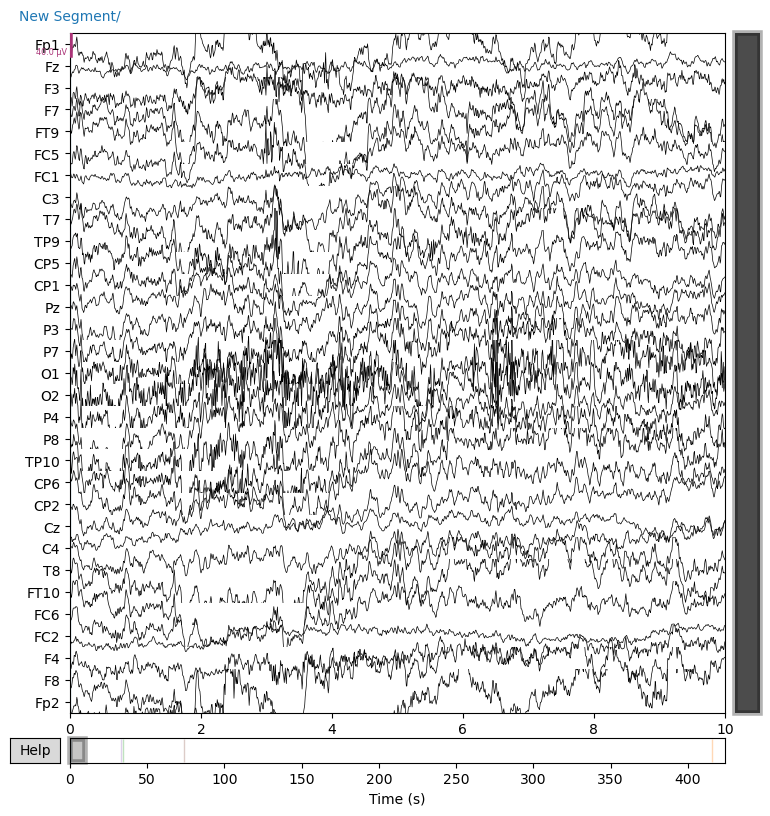

Channels marked as bad:
none


In [12]:
#проверка
path='E:/NL_resample/'

name='NP102302_NL_2.fif'

mu_1=mne.io.read_raw_fif(path+name, preload=True)
mu_1 = mu_1.drop_channels(['Photo', 'micr'])  
mu_1 = mu_1.filter(1, 50, phase='zero-double')
mu_1.plot(start=0, n_channels=len(mu_1.ch_names))